# Data inspection 

In [3]:
import os
import time
import datetime


import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import c

%matplotlib inline

In [6]:
def read_last_column(csv_file):
    sample = pd.read_csv(os.path.join(c.BASE_PATH,csv_file), nrows=1)
    
    return pd.read_csv(os.path.join(c.BASE_PATH,csv_file),usecols=[sample.shape[1]-1])

def read_first_column(csv_file):
    return pd.read_csv(os.path.join(c.BASE_PATH,csv_file),usecols=[0])

def read_first_rows(csv_file):
    return pd.read_csv(os.path.join(c.BASE_PATH,csv_file),
                       nrows=100000, 
                       index_col=0,
                       dtype='object')

def calculate_sparsity(df):
    n_nulls = df.isnull().sum().sum()
    
    return float(n_nulls)/df.size

def analyze_files(csv_file, includes_target=False):
    
    file_ids = read_first_column(csv_file)
    file_sample = read_first_rows(csv_file)
    
    # Report on id columns
    print('Id info: rows: {} | nunique: {} | min: {} | max: {} | mean diff: {}'.format(file_ids.shape[0],
                                                                                        file_ids.Id.nunique(), 
                                                                            file_ids.Id.min(), 
                                                                            file_ids.Id.max(), 
                                                                            file_ids.Id.diff().mean()))
    # Report target columns
    
    if includes_target:
        y = read_last_column(csv_file)
        file_sample.drop(file_sample.columns[-1], axis=1, inplace=True)
        print('Target mean: {}'.format(y.Response.mean()))
    
    # Report sample information
    print('Sample columns: {}'.format(file_sample.shape[1]))
    print('Sample sparsity: {}'.format(calculate_sparsity(file_sample)))
    
    print file_sample.head()
    
    
    # Report numerical analysis only if contains only numeric columns
    if (file_sample.dtypes=='object').sum()==0:
        
        s_mean = file_sample.mean()
        s_max = file_sample.max()
        s_min = file_sample.min()

        print('Sample info minima: min: {} | max: {} | mean: {}'.format(s_min.min(),
                                                                        s_min.max(), 
                                                                        s_min.mean()))
        
        print('Sample info maxima: min: {} | max: {} | mean: {}'.format(s_max.min(),
                                                                        s_max.max(), 
                                                                        s_max.mean()))

        print('Sample info mean: min: {} | max: {} | mean: {}'.format(s_mean.min(),
                                                                      s_mean.max(), 
                                                                      s_mean.mean()))
    else:
        # Analyze categorical info
        pass
    
    if includes_target:
        return file_ids, file_sample, y
    else:
        return file_ids, file_sample
    

The history saving thread hit an unexpected error (OperationalError('unable to open database file',)).History will not be written to the database.


## Inspect train data

### Categorical data

In [7]:
tr_cat = analyze_files('train_categorical.csv')

Id info: rows: 1183747 | nunique: 1183747 | min: 4 | max: 2367495 | mean diff: 1.99999915522
Sample columns: 2140
Sample sparsity: 0.973536929907
   L0_S1_F25 L0_S1_F27 L0_S1_F29 L0_S1_F31 L0_S2_F33 L0_S2_F35 L0_S2_F37  \
Id                                                                         
4        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
6        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
7        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
9        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
11       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

   L0_S2_F39 L0_S2_F41 L0_S2_F43     ...      L3_S49_F4225 L3_S49_F4227  \
Id                                   ...                                  
4        NaN       NaN       NaN     ...               NaN          NaN   
6        NaN       NaN       NaN     ...               NaN          NaN   
7        NaN       Na

### Numeric data

In [176]:
tr_num = analyze_files('train_numeric.csv', includes_target=True)

Id info: rows: 1183747 | nunique: 1183747 | min: 4 | max: 2367495 | mean diff: 1.99999915522
Target mean: 0.00581120796927
Sample columns: 968
Sample sparsity: 0.811379628099
    L0_S0_F0  L0_S0_F2  L0_S0_F4  L0_S0_F6  L0_S0_F8  L0_S0_F10  L0_S0_F12  \
Id                                                                           
4      0.030    -0.034    -0.197    -0.179     0.118      0.116     -0.015   
6        NaN       NaN       NaN       NaN       NaN        NaN        NaN   
7      0.088     0.086     0.003    -0.052     0.161      0.025     -0.015   
9     -0.036    -0.064     0.294     0.330     0.074      0.161      0.022   
11    -0.055    -0.086     0.294     0.330     0.118      0.025      0.030   

    L0_S0_F14  L0_S0_F16  L0_S0_F18      ...       L3_S50_F4243  L3_S50_F4245  \
Id                                       ...                                    
4      -0.032      0.020      0.083      ...                NaN           NaN   
6         NaN        NaN        NaN

### Date data

In [177]:
tr_date = analyze_files('train_date.csv')

Id info: rows: 1183747 | nunique: 1183747 | min: 4 | max: 2367495 | mean diff: 1.99999915522
Sample columns: 1156
Sample sparsity: 0.823041652249
    L0_S0_D1  L0_S0_D3  L0_S0_D5  L0_S0_D7  L0_S0_D9  L0_S0_D11  L0_S0_D13  \
Id                                                                           
4      82.24     82.24     82.24     82.24     82.24      82.24      82.24   
6        NaN       NaN       NaN       NaN       NaN        NaN        NaN   
7    1618.70   1618.70   1618.70   1618.70   1618.70    1618.70    1618.70   
9    1149.20   1149.20   1149.20   1149.20   1149.20    1149.20    1149.20   
11    602.64    602.64    602.64    602.64    602.64     602.64     602.64   

    L0_S0_D15  L0_S0_D17  L0_S0_D19      ...       L3_S50_D4246  L3_S50_D4248  \
Id                                       ...                                    
4       82.24      82.24      82.24      ...                NaN           NaN   
6         NaN        NaN        NaN      ...                NaN 

In [183]:
print set(tr_cat[0]) ^ set(tr_num[0])
print set(tr_cat[0]) ^ set(tr_date[0])
print set(tr_date[0]) ^ set(tr_cat[0])
print set(tr_num[0]) ^ set(tr_cat[0])

set([])
set([])
set([])
set([])


## Inspect test data

In [172]:
cat = analyze_files('test_categorical.csv')

Id info: rows: 1183748 | nunique: 1183748 | min: 1 | max: 2367494 | mean diff: 1.99999915522
Sample columns: 2140
Sample sparsity: 0.973467682243
   L0_S1_F25 L0_S1_F27 L0_S1_F29 L0_S1_F31 L0_S2_F33 L0_S2_F35 L0_S2_F37  \
Id                                                                         
1        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
5        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
8        NaN       NaN       NaN       NaN       NaN       NaN       NaN   

   L0_S2_F39 L0_S2_F41 L0_S2_F43     ...      L3_S49_F4225 L3_S49_F4227  \
Id                                   ...                                  
1        NaN       NaN       NaN     ...               NaN          NaN   
2        NaN       NaN       NaN     ...               NaN          NaN   
3        NaN       Na

In [170]:
num = analyze_files('test_numeric.csv')

Id info: rows: 1183748 | nunique: 1183748 | min: 1 | max: 2367494 | mean diff: 1.99999915522
Sample columns: 968
Sample sparsity: 0.811429504132
    L0_S0_F0  L0_S0_F2  L0_S0_F4  L0_S0_F6  L0_S0_F8  L0_S0_F10  L0_S0_F12  \
Id                                                                           
1        NaN       NaN       NaN       NaN       NaN        NaN        NaN   
2        NaN       NaN       NaN       NaN       NaN        NaN        NaN   
3        NaN       NaN       NaN       NaN       NaN        NaN        NaN   
5     -0.016    -0.026    -0.033    -0.016     0.205     -0.157        0.0   
8        NaN       NaN       NaN       NaN       NaN        NaN        NaN   

    L0_S0_F14  L0_S0_F16  L0_S0_F18      ...       L3_S50_F4243  L3_S50_F4245  \
Id                                       ...                                    
1         NaN        NaN        NaN      ...                NaN           NaN   
2         NaN        NaN        NaN      ...                NaN  

In [173]:
date = analyze_files('test_date.csv')

Id info: rows: 1183748 | nunique: 1183748 | min: 1 | max: 2367494 | mean diff: 1.99999915522
Sample columns: 1156
Sample sparsity: 0.823052128028
    L0_S0_D1  L0_S0_D3  L0_S0_D5  L0_S0_D7  L0_S0_D9  L0_S0_D11  L0_S0_D13  \
Id                                                                           
1        NaN       NaN       NaN       NaN       NaN        NaN        NaN   
2        NaN       NaN       NaN       NaN       NaN        NaN        NaN   
3        NaN       NaN       NaN       NaN       NaN        NaN        NaN   
5     255.45    255.45    255.45    255.45    255.45     255.45     255.45   
8        NaN       NaN       NaN       NaN       NaN        NaN        NaN   

    L0_S0_D15  L0_S0_D17  L0_S0_D19      ...       L3_S50_D4246  L3_S50_D4248  \
Id                                       ...                                    
1         NaN        NaN        NaN      ...                NaN           NaN   
2         NaN        NaN        NaN      ...                NaN 

In [182]:
print set(cat[0]) ^ set(num[0])
print set(cat[0]) ^ set(date[0])
print set(date[0]) ^ set(cat[0])
print set(num[0]) ^ set(cat[0])

set([])
set([])
set([])
set([])


### Check relation between test and train

In [181]:
print set(cat[0]) ^ set(tr_cat[0])
print set(date[0]) ^ set(tr_date[0])
print set(num[0]) ^ set(tr_num[0])

set([])
set([])
set([])


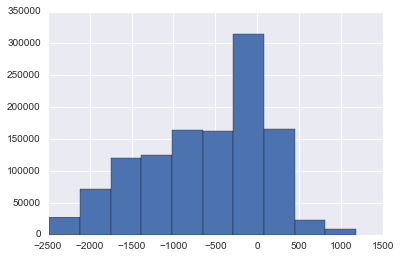

In [186]:
(cat[0].Id - tr_cat[0].Id).hist()